In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
moviesData = pd.read_csv("movies.csv")
moviesData

,age,gender,genre
0,20,M,Action
1,23,M,Action
2,25,M,Action
3,26,M,Thriller
4,29,M,Thriller
5,30,M,Thriller
6,31,M,Drama
7,33,M,Drama
8,37,M,Drama
9,20,F,Romance


In [3]:
featureRelationMatrix = moviesData.corr()
featureRelationMatrix

,age
age,1.0


<AxesSubplot:xlabel='age', ylabel='genre'>

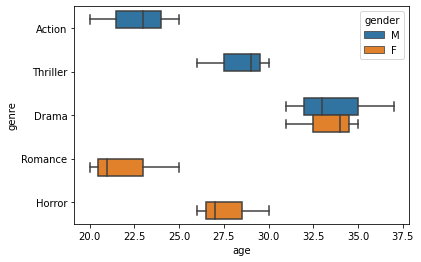

In [4]:
sns.boxplot(x=moviesData.age,y=moviesData.genre,data= moviesData,hue=moviesData.gender)

In [5]:
moviesData.gender.replace(('M', 'F'), (1, 0), inplace=True)

In [6]:
X = moviesData[['age','gender']]
X

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [7]:
y = moviesData.genre
y

0       Action
1       Action
2       Action
3     Thriller
4     Thriller
5     Thriller
6        Drama
7        Drama
8        Drama
9      Romance
10     Romance
11     Romance
12      Horror
13      Horror
14      Horror
15       Drama
16       Drama
17       Drama
Name: genre, dtype: object

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state= 4)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.score(X_train,y_train)

1.0

In [9]:
predication = model.predict(X_test)
predication

array(['Drama', 'Thriller', 'Drama', 'Romance'], dtype=object)

In [10]:
predicationData = pd.DataFrame({'Actual':y_test,'Predication': predication})
predicationData

,Actual,Predication
6,Drama,Drama
3,Thriller,Thriller
16,Drama,Drama
11,Romance,Romance


<AxesSubplot:ylabel='Predication'>

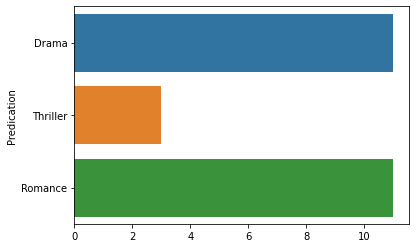

In [11]:
sns.barplot(x=predicationData.Actual.index,y=predicationData.Predication,ci=False)

# Gender Based Model

In [12]:
moviesData

,age,gender,genre
0,20,1,Action
1,23,1,Action
2,25,1,Action
3,26,1,Thriller
4,29,1,Thriller
5,30,1,Thriller
6,31,1,Drama
7,33,1,Drama
8,37,1,Drama
9,20,0,Romance


<AxesSubplot:xlabel='age', ylabel='genre'>

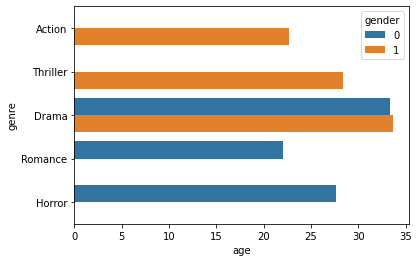

In [13]:
sns.barplot(x = moviesData.age,y=moviesData.genre,ci=False,hue=moviesData.gender)

In [14]:
maleMoviesData = moviesData[moviesData.gender==1]
femaleMoviesData = moviesData[moviesData.gender==0]
maleMoviesData,femaleMoviesData

(   age  gender     genre
 0   20       1    Action
 1   23       1    Action
 2   25       1    Action
 3   26       1  Thriller
 4   29       1  Thriller
 5   30       1  Thriller
 6   31       1     Drama
 7   33       1     Drama
 8   37       1     Drama,
     age  gender    genre
 9    20       0  Romance
 10   21       0  Romance
 11   25       0  Romance
 12   26       0   Horror
 13   27       0   Horror
 14   30       0   Horror
 15   31       0    Drama
 16   34       0    Drama
 17   35       0    Drama)

In [18]:
Xmale = maleMoviesData[['age']]
ymale = maleMoviesData.genre

In [31]:
Xmale_train,Xmale_test,ymale_train,ymale_test = train_test_split(Xmale,ymale,test_size=.20,random_state=2)
maleDataModel = DecisionTreeClassifier()
maleDataModel.fit(Xmale_train,ymale_train)
maleDataModel.score(Xmale_train,ymale_train)

1.0

In [32]:
maleDatapredication = maleDataModel.predict(Xmale_test)
malePredicationData = pd.DataFrame({'Actual':ymale_test,'Predication': maleDatapredication})
malePredicationData

,Actual,Predication
4,Thriller,Thriller
1,Action,Action


In [34]:
Xfemale = femaleMoviesData[['age']]
yfemale = femaleMoviesData.genre
Xfemale_train,Xfemale_test,yfemale_train,yfemale_test = train_test_split(Xfemale,yfemale,test_size=.20,random_state=2)
femaleDataModel = DecisionTreeClassifier()
femaleDataModel.fit(Xfemale_train,yfemale_train)
femaleDataModel.score(Xfemale_train,yfemale_train)

1.0

In [35]:
femaleDatapredication = femaleDataModel.predict(Xfemale_test)
femalePredicationData = pd.DataFrame({'Actual':yfemale_test,'Predication': femaleDatapredication})
femalePredicationData

,Actual,Predication
13,Horror,Horror
10,Romance,Romance
